# Thông tin chung

**Mục tiêu**

- Giới thiệu thao tác chọn lựa đặc trưng trong giai đoạn tiền xử lý dữ liệu.
- Giới thiệu thuật toán Random Forest thường được dùng để chọn các thuộc tính quan trọng của dữ liệu.

**Kết quả đạt được**

Sinh viên sau khi thực hành sẽ:
- Nắm vững được các bước tiền xử lý dữ liệu và cài đặt được thuật toán Random Forest.
- Cài đặt được các ví dụ thực hành

**Thời gian thực hành:** 3 tiết

**Công cụ thực hành:** Google Colab, Anaconda

# Nội dung lý thuyết

## Chọn đặc trưng quan trọng

**Một số phương pháp phổ biến**

## Thuật toán Random Forest

**Random Forest**: là thuật toán được xây dựng từ một tập hợp nhiều cây quyết định. Mỗi cây quyết định được tạo ngẫu nhiên bằng cách chọn lại mẫu (bootstrap, random sampling) và chỉ dùng một phần nhỏ tập các thuộc tính ngẫu nhiên (random features) từ toàn bộ các thuộc tính trong dữ liệu.

# Nội dung thực hành

## Mô tả bài toán
Tiếp tục với tập dữ liệu vụ tai nạn chìm tàu Titanic.

|   |   |
|---|---|
|PassengerId|Mã hành khách|
|Survived|Sống sót|
|Pclass|Hạng vé|
|Name|Tên|
|Sex|Giới tính|
|Age|Tuổi|
|SibSp|Số anh em/Vợ chồng|
|Parch|Số cha mẹ/con|
|Ticket|Số vé|
|Fare|Tiền vé|
|Cabin|Phòng|
|Embarked|Bến tàu|

Embarked:  (C = Cherbourg
    Q = Queenstown
    S = Southampton
)

Hãy thực hiện các thao tác tiền xử lý dữ liệu.

## Các thao tác tiền xử lý dữ liệu

- Đọc dữ liệu từ tập train và tập test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Các thống kê cơ bản của những thuộc tính dữ liệu số.

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Làm sạch dữ liệu

- Kiểm tra và xử lý các thuộc tính/đặc trưng bị lỗi, thiếu dữ liệu.

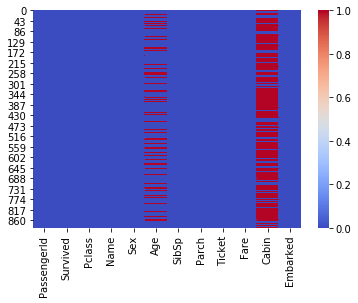

In [9]:
sns.heatmap(train.isnull(), cmap='coolwarm')

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

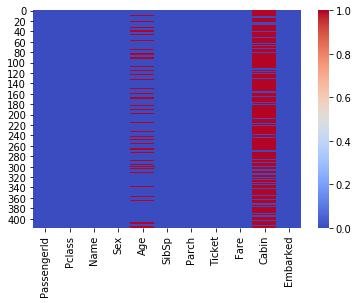

In [11]:
sns.heatmap(test.isnull(), cmap='coolwarm')

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Nhận xét:**
- Tập train có 3 đặc trưng có giá trị null là: Age, Cabin, Embarked.
- Tập test có 2 đặc trưng có giá trị null là: Age, Fare, Cabin.

**Tạo một tập dữ liệu tổng hợp từ tập train và test**

In [13]:
train_test_data = [train, test]
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

### Kiểm tra tỷ lệ sống sót và gặp nạn của từng thuộc tính

- Cài đặt hàm vẽ biểu đồ cột với tham số là tên thuộc tính của dữ liệu

In [14]:
features = train.columns.to_list()
features

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [15]:
def bar_chart(features):
    survived = train[train['Survived'] == 1][features].value_counts()
    dead = train[train['Survived'] == 0][features].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (15, 5))

**Thuộc tính Title**
- Thêm mới thuộc tính Title dựa vào cột Name: Mr, Mrs, Miss, ...

In [16]:
def add_title(train_test_data):
    for data in train_test_data:
        data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [17]:
add_title(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
print(train['Title'].count())
print(train['Title'].value_counts())

891
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Mme           1
Jonkheer      1
Lady          1
Ms            1
Don           1
Capt          1
Sir           1
Name: Title, dtype: int64


In [19]:
print(test['Title'].count())
print(test['Title'].value_counts())

418
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64


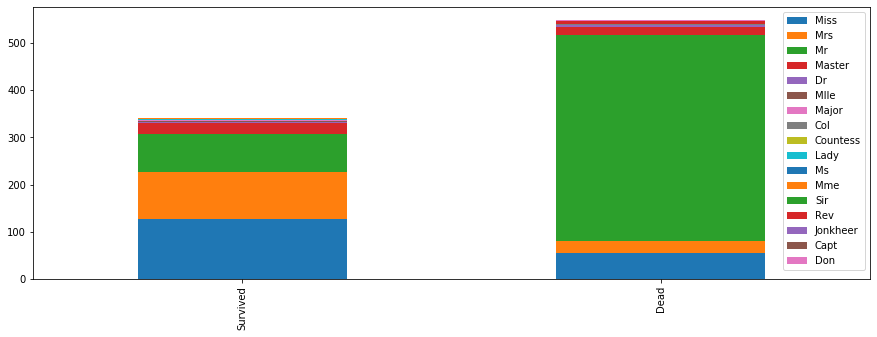

In [20]:
bar_chart('Title')

In [21]:
def transform_title(train_test_data):
    title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                     "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3, 
                     "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
    for data in train_test_data:
        data['Title'] = data['Title'].map(title_mapping)

In [22]:
transform_title(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**Thuộc tính Sex**

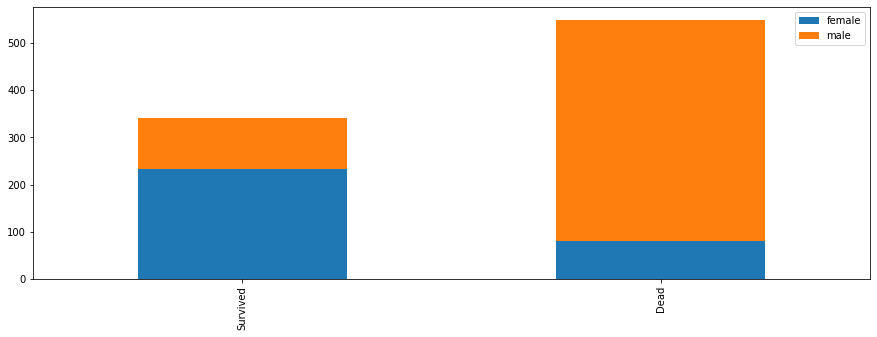

In [23]:
bar_chart('Sex')

In [24]:
def tranform_sex(train_test_data):
    sex_mapping = {'male': 0, 'female': 1}
    for data in train_test_data:
        data['Sex'] = data['Sex'].map(sex_mapping)

In [25]:
tranform_sex(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


**Thuộc tính Age**
- Dữ liệu thiếu có thể được điền theo từng nhóm của thuộc tính Title.

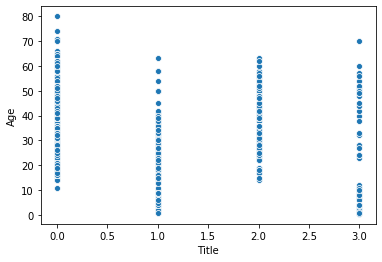

In [26]:
sns.scatterplot(x = train.Title, y = train.Age)

In [27]:
def clean_age(train_test_data):
    for data in train_test_data:
        data['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)

In [28]:
clean_age(train_test_data)

print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

0
0


In [29]:
def transform_age(train_test_data):
    for data in train_test_data:
        data.loc[data['Age'] <= 16, 'Age'] = 0,
        data.loc[(data['Age'] > 16) & (data['Age'] <= 26), 'Age'] = 1,
        data.loc[(data['Age'] > 26) & (data['Age'] <= 36), 'Age'] = 2,
        data.loc[(data['Age'] > 36) & (data['Age'] <= 62), 'Age'] = 3,
        data.loc[data['Age'] > 62, 'Age'] = 4

In [30]:
transform_age(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0


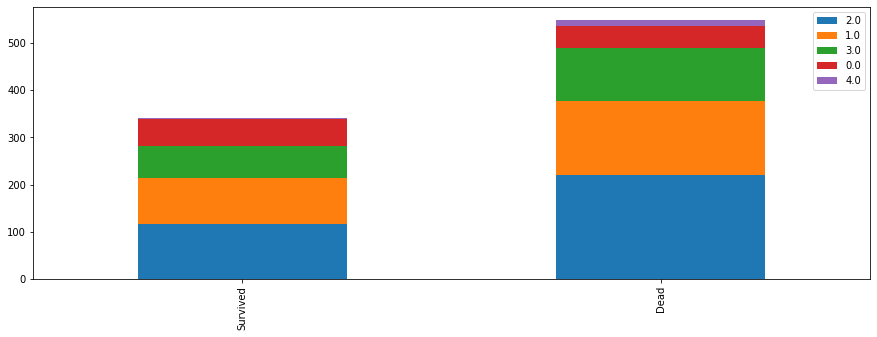

In [31]:
bar_chart('Age')

**Thuộc tính Sibsp và Parch**

- Thêm vào thuộc tính FamilySize dựa vào hai thuộc tính SibSp và Parch.

In [32]:
def add_family_size(train_test_data):
    for data in train_test_data:
        data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [33]:
add_family_size(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0,1


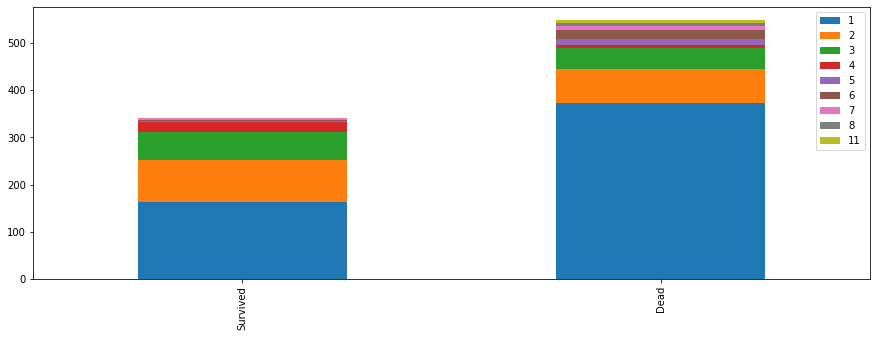

In [34]:
bar_chart('FamilySize')

**Thuộc tính Fare**

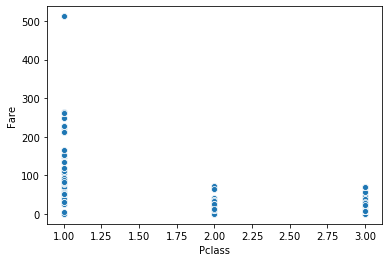

In [35]:
sns.scatterplot(x = train.Pclass, y = train.Fare)

In [36]:
def clean_fare(train_test_data):
    for data in train_test_data:
        data['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [37]:
clean_fare(train_test_data)

print(train['Fare'].isnull().sum())
print(test['Fare'].isnull().sum())

0
0


In [38]:
def tranform_fare(train_test_data):
    for data in train_test_data:
        data.loc[data['Fare'] <= 17, 'Fare'] = 0,
        data.loc[(data['Fare'] > 17) & (data['Fare'] <= 30), 'Fare'] = 1,
        data.loc[(data['Fare'] > 30) & (data['Fare'] <= 100), 'Fare'] = 2,
        data.loc[data['Fare'] > 100, 'Fare'] = 3

In [39]:
tranform_fare(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,S,0,1


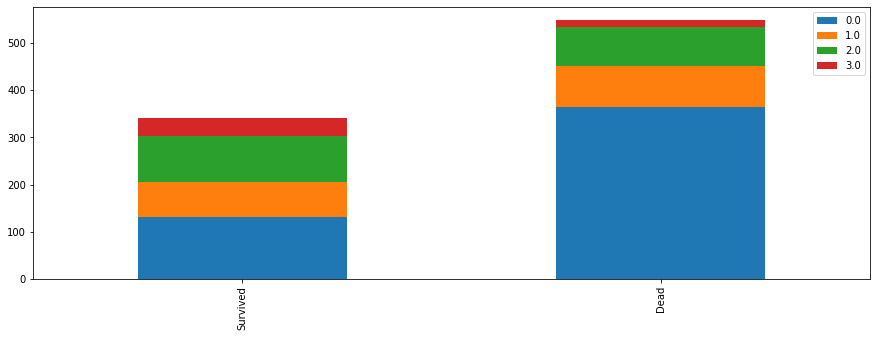

In [40]:
bar_chart('Fare')

**Thuộc tính Cabin**

In [41]:
train['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
E101               3
D                  3
C22 C26            3
F33                3
F2                 3
B18                2
D35                2
B77                2
C126               2
C93                2
B57 B59 B63 B66    2
E44                2
B28                2
E121               2
D33                2
C83                2
E24                2
B5                 2
D20                2
C123               2
C124               2
B49                2
C68                2
E25                2
B22                2
C65                2
E8                 2
                  ..
A36                1
C148               1
A6                 1
A10                1
C95                1
D37                1
B30                1
E31                1
C82                1
C50                1
B79                1
B41                1
A14                1
C45                1
D48                1
E58                1
B78          

In [42]:
test['Cabin'].value_counts()

B57 B59 B63 B66    3
F4                 2
E34                2
C23 C25 C27        2
A34                2
C31                2
C80                2
C116               2
C89                2
C55 C57            2
C78                2
B45                2
C6                 2
C101               2
D30                1
E46                1
D10 D12            1
D38                1
B71                1
D                  1
B69                1
B11                1
F2                 1
A18                1
C86                1
E45                1
F G63              1
C54                1
B36                1
B24                1
                  ..
A9                 1
C130               1
C105               1
C28                1
A11                1
C46                1
B41                1
C85                1
D19                1
B58 B60            1
D43                1
D21                1
A21                1
E31                1
D34                1
B52 B54 B56        1
C97          

In [43]:
def get_class_cabin(train_test_data):
    for data in train_test_data:
        data['Cabin'] = data['Cabin'].str[:1]

In [44]:
get_class_cabin(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C,S,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,S,0,1


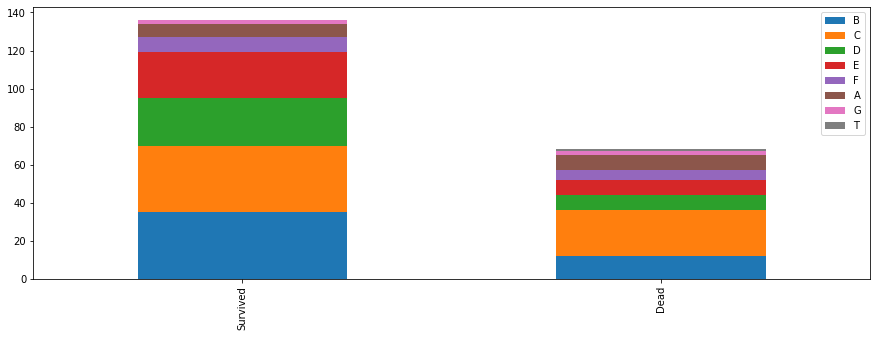

In [45]:
bar_chart('Cabin')

In [46]:
def transform_cabin(train_test_data):
    cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
    for data in train_test_data:
        data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [47]:
transform_cabin(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,S,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,S,0,1


In [48]:
def clean_cabin(train_test_data):
    for data in train_test_data:
        data['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [49]:
clean_cabin(train_test_data)

print(train['Cabin'].isnull().sum())
print(test['Cabin'].isnull().sum())

0
0


**Thuộc tính Embraked**

In [50]:
def clean_embraked(train_test_data):
    for data in train_test_data:
        data['Embarked'] = data['Embarked'].fillna('S')

In [51]:
clean_embraked(train_test_data)

print(train['Embarked'].isnull().sum())
print(test['Embarked'].isnull().sum())

0
0


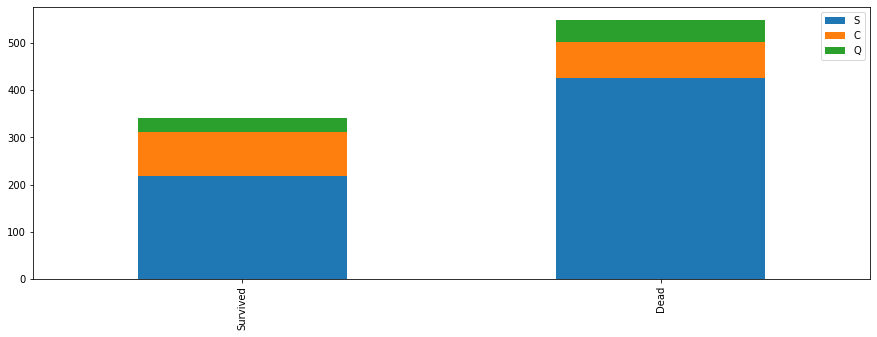

In [52]:
bar_chart('Embarked')

In [53]:
def tranform_embarked(train_test_data):
    embarked_mapping = {"S": 0, "C": 1, "Q": 2}
    for data in train_test_data:
        data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [54]:
tranform_embarked(train_test_data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0,1


## Chọn thuộc tính quan trọng

### Kiểm tra độ tương quan giữa các thuộc tính

In [55]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [56]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0,1


In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,2.0,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,0.8,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,0.0,2.0,2,0,1
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,0.8,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,0.0,2.0,0,2,3


In [59]:
corr = train.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.035896,-0.057527,-0.001652,0.004665,-0.037406,-0.030467,-0.002555,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.090499,-0.035322,0.081629,0.292884,-0.279477,0.106811,0.445792,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.314046,0.083081,0.018443,-0.693736,0.864697,0.045702,-0.164205,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.130828,0.114631,0.245489,0.216932,-0.093314,0.116569,0.557890,0.200988
Age,0.035896,-0.090499,-0.314046,-0.130828,1.000000,-0.268832,-0.171533,0.071564,-0.265643,-0.036063,-0.171512,-0.269433
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.268832,1.000000,0.414838,0.341187,0.072361,-0.059961,0.287060,0.890712
Parch,-0.001652,0.081629,0.018443,0.245489,-0.171533,0.414838,1.000000,0.364097,0.016359,-0.078665,0.341660,0.783111
Fare,0.004665,0.292884,-0.693736,0.216932,0.071564,0.341187,0.364097,1.000000,-0.668376,-0.008131,0.278740,0.415087
Cabin,-0.037406,-0.279477,0.864697,-0.093314,-0.265643,0.072361,0.016359,-0.668376,1.000000,-0.041238,-0.141768,0.057629
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.036063,-0.059961,-0.078665,-0.008131,-0.041238,1.000000,0.049699,-0.080281


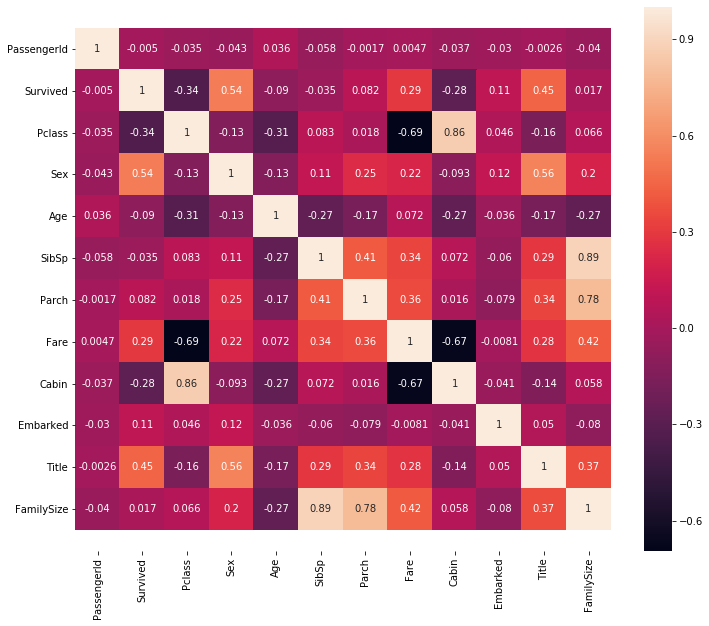

In [60]:
plt.figure(figsize = (12, 10))
ax = sns.heatmap(corr, annot = True)

## Đoạn lệnh sửa lỗi mất dòng đầu, dòng cuối ở phiên bản matplotlib 3.1.1
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##

plt.show()

- Lấy trị tuyệt đối độ tương quan của các thuộc tính.

In [61]:
corr_features = abs(corr['Survived'])

- Lấy các thuộc tính có độ tương quan > 0.1

In [62]:
relevant_features = corr_features[corr_features > 0.1]
relevant_features

Survived    1.000000
Pclass      0.338481
Sex         0.543351
Fare        0.292884
Cabin       0.279477
Embarked    0.106811
Title       0.445792
Name: Survived, dtype: float64

In [63]:
features = train.columns.tolist()
features

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'FamilySize']

In [64]:
features.remove('PassengerId')
features.remove('Survived')
features.remove('Name')
features.remove('Ticket')

In [65]:
features

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'FamilySize']

### Thuật toán Random Forest

In [66]:
rf = RandomForestClassifier(n_estimators = 10)

In [67]:
target = train['Survived']
rf.fit(train[features], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
prediction = rf.predict(test[features])

(2.5, -0.5)

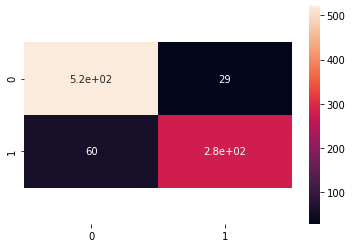

In [69]:
confusion = confusion_matrix(train['Survived'], rf.predict(train[features]))

ax = sns.heatmap(confusion, annot = True)

## Đoạn lệnh sửa lỗi mất dòng đầu, dòng cuối ở phiên bản matplotlib 3.1.1
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##

- Thuật toán Random có thể được dùng để tìm các thuộc tính quan trọng trong dữ liệu.

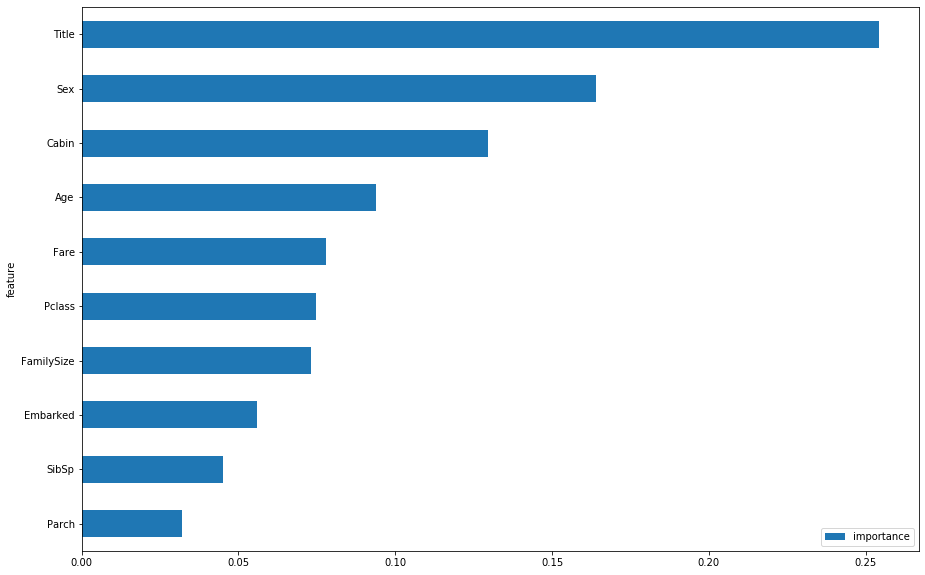

In [70]:
features_importance = pd.DataFrame()
features_importance['features'] = features
features_importance['importances'] = rf.feature_importances_
features_importance.sort_values(by = ['importances'], ascending = True, inplace = True)
features_importance.set_index('features', inplace = True)
features_importance.plot(kind = 'barh', figsize = (15, 10))

- Độ chính xác của từng thuộc tính.

In [71]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [72]:
scoring = 'accuracy'
score = pd.DataFrame()
score['Feature'] = features
score['Accuracy'] = cross_val_score(rf, train[features], target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

      Feature  Accuracy
0      Pclass  0.777778
1         Sex  0.808989
2         Age  0.797753
3       SibSp  0.786517
4       Parch  0.842697
5        Fare  0.808989
6       Cabin  0.808989
7    Embarked  0.797753
8       Title  0.741573
9  FamilySize  0.808989


- Trung bình độ chính xác của tất cả các thuộc tính.

In [73]:
round(np.mean(score) * 100, 2)

Accuracy    79.8
dtype: float64

In [74]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': prediction
})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [75]:
submission.to_csv('titanic_output.csv', index = False)

# Bài tập


In [76]:
pokemon = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')
pokemon_gen = pd.get_dummies(pokemon['Generation'])
pokemon_gen.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [77]:
target = train['Survived']
rf.fit(train[features], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)